<a href="https://colab.research.google.com/github/ApusDT/CNN-Data-Augmentation/blob/main/CNN%20Data%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ENTREGA 2 Programación Avanzada - Red neuronal Convolucional usando Cifar 10 en Keras
 Salomé Sepúlveda 



### Se importan librerías

In [ ]:
import tensorflow as tf

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from time import time
from keras.models import Sequential

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np


from random import randrange
from time import time

##Exploración y visualización
**Se carga del dataset y se codifican las etiquetas en formato ‘one-hot’.**

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(X_train, y_trainp), (X_test, y_testp) = cifar10.load_data()
	# one hot encode target values
  
	y_train = to_categorical(y_trainp,10)
	y_test = to_categorical(y_testp,10)
	return X_train, y_train, X_test, y_test


In [ ]:
X_train, y_train, X_test, y_test=load_dataset()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(X_train[0,0,0,0])

numpy.uint8

In [ ]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [ ]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

**Se visualizan los datos**

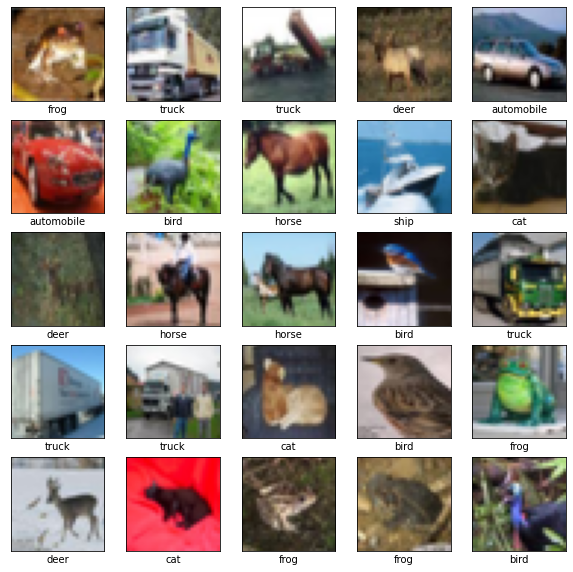

In [ ]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) 
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    ind = [ j for j,k in enumerate(y_train[i]) if k == 1.] #Función que retorna el indice del valor i
    plt.xlabel(class_names[ind[0]])
plt.show()



Se muestra el tipo de dato (array.dtype)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Se transforman los datos a formato ‘float32’ y se normalizan las imágenes

In [ ]:
	# scale pixels
def prep_pixels(train, test):
	# Se convierten las imágenes a floats
	  train_norm = train.astype('float32')
	  test_norm = test.astype('float32')
  # Se normalizan en rango 0-1
	  train_norm = train_norm / 255.0
	  test_norm = test_norm / 255.0
	# Se retornan las imágenes
	  return train_norm, test_norm


In [ ]:
X_train_norm, X_test_norm=prep_pixels(X_train, X_test)

###Tamaño de las características y etiquetas para entrenamiento y validación.

In [ ]:
X_train_norm.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
X_test_norm.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 10)

#Definición de los modelos
A continuación se quiere mostrar que muchas veces, más líneas de código no implican una mejora del modelo.

Tarea: mostrar el resumen de la red (model.summary()). Justificar cómo se obtiene el número de parámetros de la primera capa convolucional. Comparar el número de parámetros total con el de redes neuronales conocidas, por ejemplo, inception, AlexNet o mobilenet.

Se implementa el uso de condicionales para optimizar la elección de parámetros y así obtener un mejor *accuracy*.
Se define un modelo de red neuronal convolucional usando Conv2D, DropOut y MaxPooling2D. Se indica además, que la dimensión de entrada en la primera capa ‘input_shape = (32,32,3)’.

In [ ]:
# function to create the model for Keras wrapper to scikit learn
# we will optimize the type of pooling layer (max or average) and the activation function of the 2nd and 3rd convolution layers 

def create_cnn_model(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
    # create model
    model = Sequential()
    
    # first layer: convolution
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

        
    # second series of layers: convolution, pooling, and dropout
    model.add(Conv2D(64, (3, 3), activation='relu'))  
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
    
    # third series of layers: convolution, pooling, and dropout    
    model.add(Conv2D(64, kernel_size=(3, 3), activation=conv_activation))   # 32   
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
      
    # fourth series
    model.add(Flatten())         
    model.add(Dense(64, activation='sigmoid')) # 64
    # add a dropout layer if rate is not null    
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate)) 
        
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile( 
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
    return model

cnn = create_cnn_model()

cnn.compile(
  optimizer='adam',
  loss='categorical_crossentropy',  
  metrics=['accuracy'],
)

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0

In [ ]:
	# fit model
history = cnn.fit(X_train_norm, y_train, epochs=30, batch_size=64, validation_data=(X_test_norm, y_test), verbose=1)
##esto tb estaba agregqado callbacks = [early_stop]

Epoch 1/30
782/782 [==============================] - 39s 8ms/step - loss: 1.9132 - accuracy: 0.2910 - val_loss: 1.3764 - val_accuracy: 0.5015
Epoch 2/30
782/782 [==============================] - 6s 7ms/step - loss: 1.3201 - accuracy: 0.5286 - val_loss: 1.1507 - val_accuracy: 0.5869
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 1.1274 - accuracy: 0.6025 - val_loss: 1.0221 - val_accuracy: 0.6382
Epoch 4/30
782/782 [==============================] - 6s 7ms/step - loss: 0.9855 - accuracy: 0.6524 - val_loss: 0.9458 - val_accuracy: 0.6637
Epoch 5/30
782/782 [==============================] - 6s 7ms/step - loss: 0.8924 - accuracy: 0.6920 - val_loss: 0.8722 - val_accuracy: 0.6927
Epoch 6/30
782/782 [==============================] - 6s 7ms/step - loss: 0.8336 - accuracy: 0.7093 - val_loss: 0.8392 - val_accuracy: 0.7081
Epoch 7/30
782/782 [==============================] - 6s 7ms/step - loss: 0.7714 - accuracy: 0.7310 - val_loss: 0.7967 - val_accuracy: 0.7238
Epoch

313/313 - 1s - loss: 0.7955 - accuracy: 0.7549


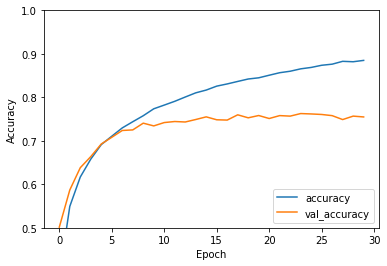

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test_norm, y_test, verbose=2)

In [ ]:
print(test_acc)

0.748199999332428


#5. Realizar dos cambios en el modelo.
Para la red o el algoritmo de entrenamiento, para mejorar los resultados sucesivamente (primero un cambio y luego otro). Explicando el razonamiento seguido y los efectos buscados.

##Primer cambio: menos es más
Se prescinde de los condicionales y se entrena una red sin de construcción regular.


In [ ]:
# Se  define el modelo de cnn 
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))     
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))     
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
	#compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model= define_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 32)         

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Aprendizaje del modelo 

In [ ]:
	# fit model
history = model.fit(X_train_norm, y_train, epochs=30, batch_size=64, validation_data=(X_test_norm, y_test), verbose=1)


Epoch 1/30
782/782 [==============================] - 5s 6ms/step - loss: 2.1606 - accuracy: 0.2127 - val_loss: 1.7015 - val_accuracy: 0.4061
Epoch 2/30
782/782 [==============================] - 4s 6ms/step - loss: 1.6960 - accuracy: 0.3845 - val_loss: 1.5205 - val_accuracy: 0.4637
Epoch 3/30
782/782 [==============================] - 4s 6ms/step - loss: 1.5416 - accuracy: 0.4406 - val_loss: 1.4238 - val_accuracy: 0.4970
Epoch 4/30
782/782 [==============================] - 4s 6ms/step - loss: 1.4461 - accuracy: 0.4799 - val_loss: 1.3484 - val_accuracy: 0.5212
Epoch 5/30
782/782 [==============================] - 4s 6ms/step - loss: 1.3694 - accuracy: 0.5083 - val_loss: 1.2963 - val_accuracy: 0.5384
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 1.3294 - accuracy: 0.5251 - val_loss: 1.2741 - val_accuracy: 0.5401
Epoch 7/30
782/782 [==============================] - 4s 6ms/step - loss: 1.2780 - accuracy: 0.5421 - val_loss: 1.2292 - val_accuracy: 0.5652
Epoch 

Se genera gráfica del modelo

313/313 - 1s - loss: 0.8210 - accuracy: 0.7177


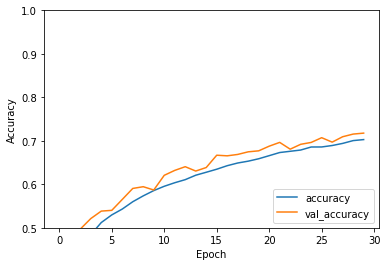

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_norm, y_test, verbose=2)

In [ ]:
print(test_acc)

0.770799994468689


Como se puede apreciar, con menos líneas de código se pudo mejorar en alredor de 1 punto. El logro, además que el porcentage en sí, es la menor demanda de tiempo para la máquina.

##Segundo cambio : Grid SearCV
Para mejorar la prestación del modelo se usa GridSearchCV en la primera variación; ya que es la más óptima.

In [ ]:
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

Se modifica la primera variación con el fin de poder implementar GRidSearchCV.

In [ ]:
def defining_model( optimizer='SGD', lr=0.001, momentum=0.9):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))     
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))     
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
	#compile model
  if optimizer=='SGD':
    opt = SGD(lr=lr, momentum=momentum)
  else:
    opt=optimizer
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model= defining_model()

Se plicará GridSearchCV para encontrar el mejor optimizador y las epochs

In [ ]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from time import time
from keras.models import Sequential

# optimize model 
start = time()   

# create model
model = KerasClassifier(build_fn=defining_model, verbose=1)

# define parameters and values for grid search 
param_grid = { 
    'optimizer': ['adam','Adamgrad', 'SGD'],  
    'epochs': [10,30,50]}

grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)


In [ ]:
grid_result = grid.fit(X_train_norm,y_train)

Epoch 1/10
1250/1250 [==============================] - 37s 4ms/step - loss: 1.8763 - accuracy: 0.3303
Epoch 2/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2156 - accuracy: 0.5666
Epoch 3/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0519 - accuracy: 0.6265
Epoch 4/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9454 - accuracy: 0.6695
Epoch 5/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.8972 - accuracy: 0.6873
Epoch 6/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.8378 - accuracy: 0.7048
Epoch 7/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.7934 - accuracy: 0.7211
Epoch 8/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.7764 - accuracy: 0.7260
Epoch 9/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7344 - accuracy: 0.7427
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.7737

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown optimizer: Adamgrad

  FitFailedWarning)


Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1450 - accuracy: 0.2082
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6531 - accuracy: 0.4008
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4774 - accuracy: 0.4670
Epoch 4/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.3696 - accuracy: 0.5082
Epoch 5/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.3006 - accuracy: 0.5346
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2241 - accuracy: 0.5653
Epoch 7/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.1793 - accuracy: 0.5823
Epoch 8/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.1224 - accuracy: 0.6058
Epoch 9/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0883 - accuracy: 0.6163
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.9953 

In [ ]:
# Summarize results
print('Tiempo usado en calcular los mejores parámetros = {:.0f} sec'.format(time()-start)) 
display_cv_results(grid_result)


Tiempo usadoen calcular los mejores parámetros = 4778 sec
Best score = 0.7609 using {'epochs': 50, 'optimizer': 'SGD'}
mean test accuracy +/- std = 0.7304 +/- 0.0096 with: {'epochs': 10, 'optimizer': 'adam'}
mean test accuracy +/- std = nan +/- nan with: {'epochs': 10, 'optimizer': 'Adamgrad'}
mean test accuracy +/- std = 0.6533 +/- 0.0034 with: {'epochs': 10, 'optimizer': 'SGD'}
mean test accuracy +/- std = 0.7539 +/- 0.0048 with: {'epochs': 30, 'optimizer': 'adam'}
mean test accuracy +/- std = nan +/- nan with: {'epochs': 30, 'optimizer': 'Adamgrad'}
mean test accuracy +/- std = 0.7389 +/- 0.0049 with: {'epochs': 30, 'optimizer': 'SGD'}
mean test accuracy +/- std = 0.7577 +/- 0.0076 with: {'epochs': 50, 'optimizer': 'adam'}
mean test accuracy +/- std = nan +/- nan with: {'epochs': 50, 'optimizer': 'Adamgrad'}
mean test accuracy +/- std = 0.7609 +/- 0.0024 with: {'epochs': 50, 'optimizer': 'SGD'}


Se vuelve a entrenar la red original con los cambios sugeridos, variando la taza de aprendizaje

In [ ]:
modele= defining_model(optimizer='SGD', lr=0.003, momentum=0.9)

#6. Aumentar los datos de entrenamiento: data augmentation.
Añadiendo las imágenes reflejadas horizontalmente y volver a entrenar, partiendo de la red recién inicializada (sin entrenar aún).


###Exploración y visualización 

Se crea un ciclo para recorrer las imágenes de train, y girarlas.

In [ ]:
X_flipped = []
for i in X_train:
  X_flipped.append(np.flip(i, 1))

Se grafican las imágenes giradas

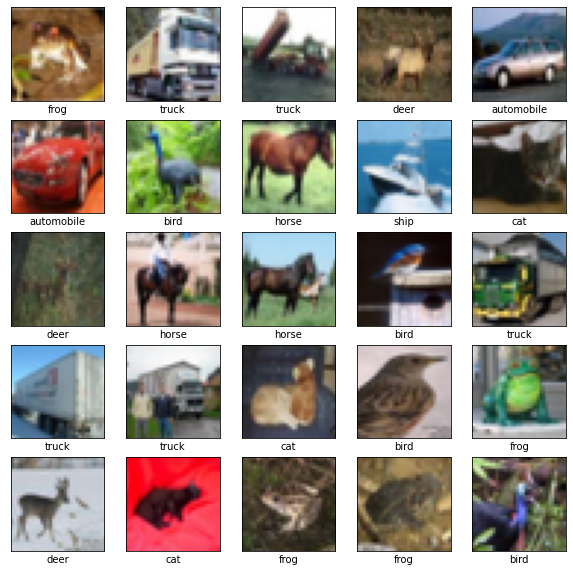

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_flipped[i], cmap=plt.cm.binary) 
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    ind = [ j for j,k in enumerate(y_train[i]) if k == 1.] #Función que retorna el indice del valor i
    plt.xlabel(class_names[ind[0]])
plt.show()

Se grafican las imágenes originales para comprobar que efectivamente, se hayan girado

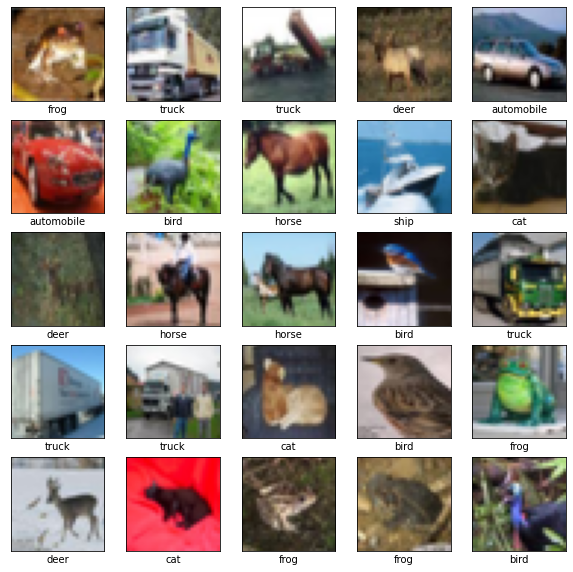

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary) 
    # Las etiquetas de CIFAR son arrays, 
    # por eso se necesita el índice extra 
    ind = [ j for j,k in enumerate(y_train[i]) if k == 1.] #Función que retorna el indice del valor i
    plt.xlabel(class_names[ind[0]])
plt.show()

In [ ]:
#Se convierten las imágenes en un areglo numpy
X_flipped=np.array(X_flipped)

In [ ]:
#Se observa el tamaño de las imágenes giradas
X_flipped.shape

(50000, 32, 32, 3)

Se normalizan las imágenes

In [ ]:
X_flipped=X_flipped/255

In [ ]:
#Se imprimen el arreglo recién generado para corroborar que esté en o y 1
print(X_flipped)

[[[[0.58039216 0.48627451 0.40392157]
   [0.59607843 0.49019608 0.4       ]
   [0.61960784 0.51764706 0.42352941]
   ...
   [0.19607843 0.18823529 0.16862745]
   [0.16862745 0.18039216 0.17647059]
   [0.23137255 0.24313725 0.24705882]]

  [[0.47843137 0.34117647 0.22352941]
   [0.46666667 0.3254902  0.19607843]
   [0.48235294 0.34509804 0.21568627]
   ...
   [0.07058824 0.03137255 0.        ]
   [0.         0.         0.        ]
   [0.0627451  0.07843137 0.07843137]]

  [[0.42745098 0.28627451 0.16470588]
   [0.47058824 0.32941176 0.19607843]
   [0.4627451  0.32941176 0.19607843]
   ...
   [0.19215686 0.10588235 0.03137255]
   [0.0627451  0.02745098 0.        ]
   [0.09803922 0.09411765 0.08235294]]

  ...

  [[0.20784314 0.13333333 0.07843137]
   [0.21960784 0.12156863 0.02745098]
   [0.62745098 0.52156863 0.2745098 ]
   ...
   [0.77647059 0.63137255 0.10196078]
   [0.78823529 0.6        0.13333333]
   [0.81568627 0.66666667 0.37647059]]

  [[0.3254902  0.20784314 0.13333333]
   [0.3

In [ ]:
#Se comprueba el largo del train 
print(len(y_train))

50000


In [ ]:
#Se concatenan y train a sí mismo para que nos quede consistente y así poder aplicar el modelo, de lo contrario nos dirá que hay más x que y
y_train_final= np.concatenate((y_train,y_train))
print(len(y_train_final))

100000


In [ ]:
#Se concatena con el train original
X_train_final= np.concatenate((X_train_norm,X_flipped))

In [ ]:
#Se comprueba la simensión de el conjunto reado anteriormente
X_train_final.shape

(100000, 32, 32, 3)

In [ ]:
#Se imprime el largo de el arreglo y, para comprobar consistencia
print(len(y_test))

10000


##Se entrena modelo con las imagenes volteadas
Se usara el modelo con las mejoras aportadas por GridSearchCV y con la taza de aprendizaje estudiada en el apartado anterior.




In [ ]:
history = modele.fit(X_train_final, y_train_final, epochs=50, batch_size=64, validation_data=(X_test_norm, y_test), verbose=1)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9621 - accuracy: 0.2815 - val_loss: 1.3870 - val_accuracy: 0.5107
Epoch 2/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3760 - accuracy: 0.5035 - val_loss: 1.1562 - val_accuracy: 0.6000
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1904 - accuracy: 0.5757 - val_loss: 1.0502 - val_accuracy: 0.6355
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0768 - accuracy: 0.6207 - val_loss: 0.9393 - val_accuracy: 0.6814
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9784 - accuracy: 0.6526 - val_loss: 0.8769 - val_accuracy: 0.7004
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9180 - accuracy: 0.6765 - val_loss: 0.8384 - val_accuracy: 0.7147
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8745 - accuracy: 0.6934 - val_loss: 0.8170 - val_accuracy:

313/313 - 1s - loss: 2.5049 - accuracy: 0.1038


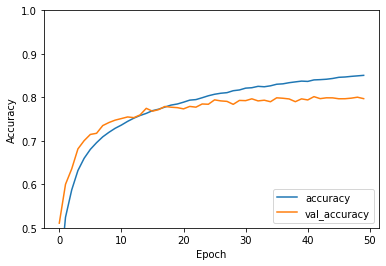

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_norm, y_test, verbose=2)

###Implemenatcción del modelo
Se uasrá el mismo modelo que en la segunda variación , con los resultados aportados por grid search:

- Best score = 0.7609 using {'epochs': 50, 'optimizer': 'SGD'}

In [ ]:
modelc= defining_model(optimizer='SGD', lr=0.003, momentum=0.9)

Se entrena el modelo

In [ ]:
history = modelc.fit(X_train_final, y_train_final, epochs=50, batch_size=64, validation_data=(X_test_norm, y_test), verbose=1)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9250 - accuracy: 0.2943 - val_loss: 1.3460 - val_accuracy: 0.5191
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3686 - accuracy: 0.5058 - val_loss: 1.1858 - val_accuracy: 0.5862
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2025 - accuracy: 0.5693 - val_loss: 1.0578 - val_accuracy: 0.6303
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0841 - accuracy: 0.6144 - val_loss: 1.0233 - val_accuracy: 0.6493
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0059 - accuracy: 0.6445 - val_loss: 0.9023 - val_accuracy: 0.6961
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9308 - accuracy: 0.6721 - val_loss: 0.8452 - val_accuracy: 0.7134
Epoch 7/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8813 - accuracy: 0.6896 - val_loss: 0.7999 - val_accuracy:

Se grafican la historia del aprendizaje del modelo.

313/313 - 1s - loss: 0.5981 - accuracy: 0.7973


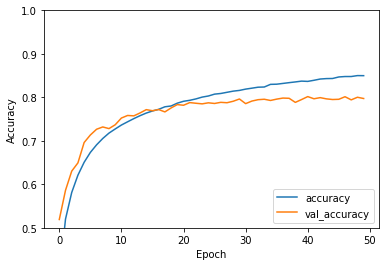

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelc.evaluate(X_test_norm, y_test, verbose=2)

In [ ]:
print(test_acc)

0.7932999730110168


La mitad del dataset es una CL del dataset original, por tanto podría ser normal que haya overfitting... (se preocupó de la mitad del dataset)

#7. Obtener de otras fuentes imágenes de varias de las categorías de CIFAR10.
Redimensionarlas al tamaño de entrada de la red, 32x32 píxeles y transformarlas en un array de numpy con el formato de entrada de la red. 


**Se hace uso de un subconjunto de la base cininc10, con 200 muestras de cada etiqueta.**


###Preparación del entorno.

In [ ]:
import os
from os import listdir
from os.path import isfile, join
from os import walk
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pillow

In [ ]:
!pip install Image

     |████████████████████████████████| 7.9MB 9.2MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=b83ae5bb24d3ea24b32c752bd621b88d4fda5a811732ac0207aa22ada8ef2070
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built Image


In [ ]:
from PIL import Image

Se carga el fichero.

In [ ]:
root = "/content/drive/My Drive/Colab Notebooks/train (200 samples)/"
paths = listdir(os.path.join(os.getcwd(), root))

###Preparación de la data.

Se crea un ciclo para obtener las imágenes desde sus carpetas respectivas.

In [ ]:
pixels = []
labels = []
label_names=[]
cont=0
for i in class_names:
  imgPaths = root+"/"+i #se leen las carpetas
  for j in listdir(imgPaths): #se entra a cada directorio y se leen las imágenes
    im = Image.open(imgPaths+"/"+j)    #se obtiene la info de cada imagen
    pixels.append(list(im.getdata())) #se convierten los vectores RGB de cada pixel, en formato de lista
    labels.append(cont) #se agrega como label, el nmbre de la carpeta padre de la imagen
    label_names.append(i)
  cont+=1

In [ ]:
#Se comprueba que las clases estén ordenadas alfabéticamente y sean las mismas.
print(label_names)
print(class_names)

['airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'airplane', 'ai

Se eliminan imágenes con formato incorrecto.

In [ ]:
shaps = [] #refiere a las shapes de las imag vectorizadas en formato np array (32,32,3)
lbls = [] #etiquetas
for i,j in enumerate(pixels): #se enumera la lista de metadata de la image obtenida en las celdas anteriores
  try:                  #intenta que, todo lo que está dentro de try, se ejecute de forma correcta. si genera error, rompe la ejecución de try y ejecuta lo que está dentro de except, así se evitan errores
    shaps.append(np.array(pixels[i]).reshape(32,32,3))  #se agrega el formato necesario para introducir las imágenes en la red
    lbls.append(labels[i]) #se añaden las etiquetas
  except:                                                    
    print("An exception occurred ",i)


An exception occurred  39


In [ ]:
lbls = np.array(lbls) #se convierte la lista de labels a np array

Se separan los datos en entrenamiento y test.

In [ ]:
import numpy

pcrt_trn = int(len(shaps)*.70) #se coge el 70% de las imágenes vectorizadas en la celda anterior para trainijng
pcrt_tst = int(len(shaps)*.30)   #se coge el 30% de las imágenes vectorizadas en la celda anterior para test
shaps = np.array(shaps)
training_idx = numpy.random.randint(shaps.shape[0], size=pcrt_trn) #índices de traning
test_idx = numpy.random.randint(shaps.shape[0], size=pcrt_tst)   #índices de test
X_train_nuevo, X_test_nuevo = shaps[training_idx,:], shaps[test_idx,:] #se obtienen las filas a partir de los indicadores que van a ser ocupados
y_train_nuevo, y_test_nuevo = lbls[training_idx],lbls[test_idx]      #como lbs es un vector, sólo se le pasan los índices que se necesitan


In [ ]:
#Se convierte y_test a formato one-hot
y_test_nuevo=to_categorical(y_test_nuevo,10)


In [ ]:
#Se convierte y_train a formato one-hot
y_train_nuevo=to_categorical(y_train_nuevo,10)

In [ ]:
#Se corroboran las clases
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Visualización de las imágenes

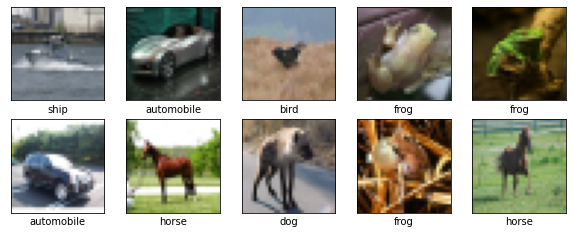

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_nuevo[i]) 
    ind = [ j for j,k in enumerate(y_train_nuevo[i]) if k == 1.] #Función que retorna el indice del valor i
    plt.xlabel(class_names[ind[0]])
plt.show()


In [ ]:
X_train_nuevo.shape

(1399, 32, 32, 3)

In [ ]:
y_train_nuevo.shape

(1399, 10)

In [ ]:
X_test_nuevo.shape

(599, 32, 32, 3)

In [ ]:
y_test_nuevo.shape

(599, 10)

###Predicción

In [ ]:
#Se crea un arreglo aleatorio
redict_idx = numpy.random.randint(X_train_nuevo.shape[0], size=100) #índices de prediccion
X_to_predict = X_train_nuevo[predict_idx,:]

In [ ]:
#Se crea variable para almacenar la predicción
y_predict = modelc.predict_classes(X_to_predict)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_predict = np.argmax(modelc.predict(X_to_predict), axis=-1)

In [ ]:
y_original = y_train_nuevo[predict_idx]

In [ ]:
y_predict = to_categorical(y_predict)

In [ ]:
def listToString(s):     
    str1 = " "     
    return (str1.join(s))

def compare_acc(original,predict,clases):
  
  if len(original) != len(predict):
    return "Error longitud de clases: original {}, predicción {}".format(len(original),len(predict))
  cont = 0
  for i,j in enumerate(original):
    if listToString(str(j)) != listToString(str(predict[i])):
      cont += 1
  return len(original)-cont

In [ ]:
accuracy_final = compare_acc(y_original,y_predict,class_names)

In [ ]:
print("De los {} valores para predecir, hubo {} correctos".format(len(y_original),accuracy_final))

De los 100 valores para predecir, hubo 41 correctos


In [ ]:
y_predict

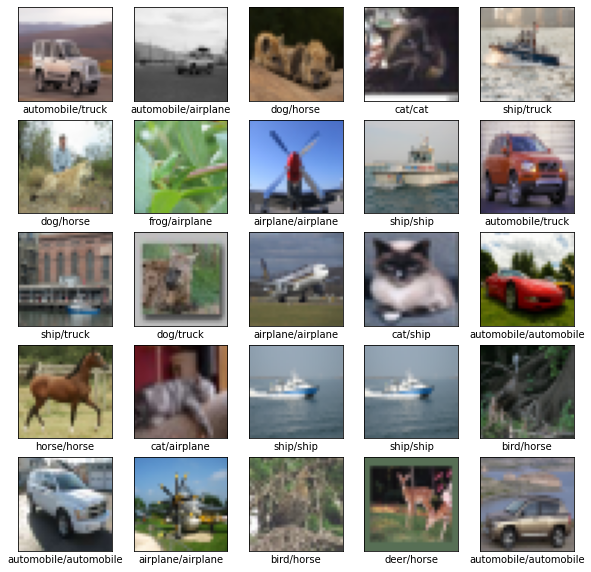

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_to_predict[i]) 
    ind = [ j for j,k in enumerate(y_predict[i]) if k == 1.] #Función que retorna el indice del valor i
    indo = [ j for j,k in enumerate(y_original[i]) if k == 1.] #Función que retorna el indice del valor i
    label = "{}/{}".format(class_names[indo[0]], class_names[ind[0]])
    plt.xlabel(label)
plt.show()
